In [91]:
import pandas as pd

In [92]:
df = pd.read_csv("top_locs_municipal_gsolar_full.csv")

In [93]:
df

,NGUID,State,LATITUDE,LONGITUDE,ORIG_ADDR,GEOCITY,GEOZIP,GEOSTATE,GEOBG20,GEOCOUNTY,...,boundingBox.ne.longitude,imageryProcessedDate.year,imageryProcessedDate.month,imageryProcessedDate.day,whole_sun_quant,potential_sun_quant,place_name,place_type,google_full_adrs,10k_ave_DACS
0,URN:EMERGENCY:UID:GIS:SSAP:14108:GREENE.IN.US,IN,39.042062,-87.172579,618 W GLENBURN RD,LINTON,47441,IN,180559551001,GREENE,...,-87.171737,2023,10,20,1281.272727,1277.818182,Glenburn Home,"['point_of_interest', 'health', 'establishment']","205 Soo Line Railroad, Linton, IN 47441, USA",17.149521
1,URN:EMERGENCY:UID:GIS:SSAP:2585:DUBOIS.IN.US,IN,38.279798,-86.960411,903 SOUTH MAIN STREET,HUNTINGBURG,47542,IN,180379538004,DUBOIS,...,-86.959886,2023,10,22,1367.727273,1364.909091,Central Christian Church,"['church', 'place_of_worship', 'point_of_inter...","903 S Main St, Huntingburg, IN 47542, USA",15.827830
2,URN:EMERGENCY:UID:GIS:SSAP:533:DUBOIS.IN.US,IN,38.308784,-86.959757,110 EAST VETERANS PARKWAY,HUNTINGBURG,47542,IN,180379538002,DUBOIS,...,-86.959263,2023,10,22,1320.363636,1312.727273,Huntingburg,"['locality', 'political']","110 East 14th Street, Huntingburg, IN 47542, USA",15.827830
3,URN:EMERGENCY:UID:GIS:SSAP:1622:DUBOIS.IN.US,IN,38.295484,-86.948337,317 ST MARYS DRIVE WEST,HUNTINGBURG,47542,IN,180379538004,DUBOIS,...,-86.948069,2023,10,22,1329.090909,1325.636364,Guadalupe Center,"['church', 'place_of_worship', 'point_of_inter...","313 N Washington St, Huntingburg, IN 47542, USA",15.827830
4,URN:EMERGENCY:UID:GIS:SSAP:2945:DAVIESS.IN.US,IN,38.660749,-87.172657,405 NE 3RD ST,WASHINGTON,47501,IN,180279548001,DAVIESS,...,-87.172420,2023,10,20,1316.272727,1311.727273,Our Lady of Hope,"['church', 'place_of_worship', 'point_of_inter...","405 NE 3rd St, Washington, IN 47501, USA",18.704380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,URN:EMERGENCY:UID:GIS:SSAP:14715:GREENE.IN.US,IN,39.041437,-87.174067,834 7TH ST NW,LINTON,47441,IN,180559551002,GREENE,...,-87.174070,2023,10,20,1105.727273,1105.727273,Linton,"['locality', 'political']","834 7th St NW, Linton, IN 47441, USA",17.149521
193,URN:EMERGENCY:UID:GIS:SSAP:14796:GREENE.IN.US,IN,39.041244,-87.173978,818 7TH ST NW,LINTON,47441,IN,180559551002,GREENE,...,-87.174070,2023,10,20,1105.727273,1105.727273,Linton,"['locality', 'political']","818 7th St NW, Linton, IN 47441, USA",17.149521
194,URN:EMERGENCY:UID:GIS:SSAP:19859:GREENE.IN.US,IN,39.041050,-87.171961,793 N GRANT,LINTON,47441,IN,180559551003,GREENE,...,-87.171951,2023,10,20,1095.636364,1090.181818,The health Center at Glenburn Harmony,"['health', 'point_of_interest', 'establishment']","793 Grant, Linton, IN 47441, USA",17.149521
195,URN:EMERGENCY:UID:GIS:SSAP:14567:GREENE.IN.US,IN,39.040801,-87.172099,775 N GRANT,LINTON,47441,IN,180559551003,GREENE,...,-87.171951,2023,10,20,1095.636364,1090.181818,The health Center at Glenburn Harmony,"['health', 'point_of_interest', 'establishment']","775 Grant, Linton, IN 47441, USA",17.149521


We will start buy calculating the nominal and predicted solar power for each array.

The nominal is calculated as the number of panels multiplied by the power of each panel. For this project we will assume that each panel is 300W. This is a generalization as panels can come in a variety of sizes but 300W seems like a good average based on our research.

In [94]:
# Set the panel power (in watts)
panel_power = 300

# Calculate nominal power in W and add as a new field
df['Nominal Power (W)'] = df['solarPotential.maxArrayPanelsCount'] * panel_power

In [95]:
df['Nominal Power (W)']

0      1157700.0
1       373200.0
2       368400.0
3       288300.0
4       288000.0
         ...    
192       3600.0
193       3600.0
194       2700.0
195       2700.0
196       2100.0
Name: Nominal Power (W), Length: 197, dtype: float64

We can view the distributions of nominal power across the sites here.

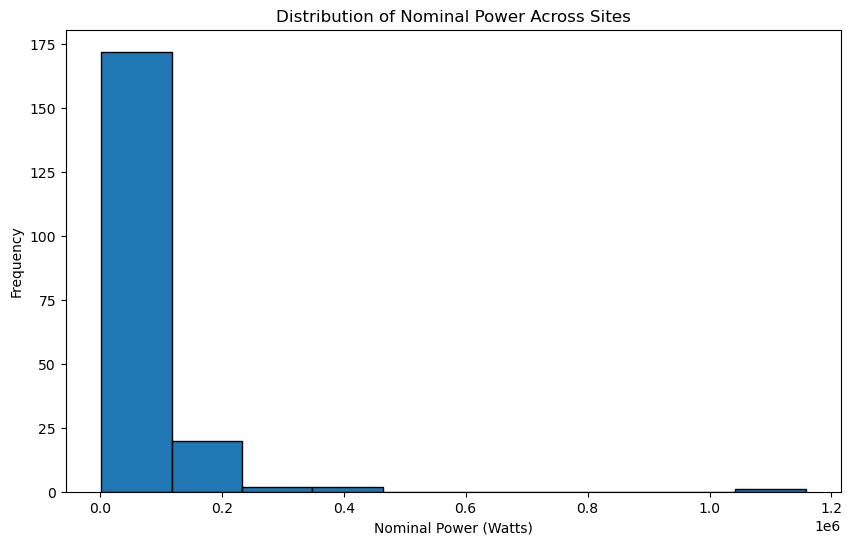

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Nominal Power (W)'], bins=10, edgecolor='black')
plt.xlabel('Nominal Power (Watts)')
plt.ylabel('Frequency')
plt.title('Distribution of Nominal Power Across Sites')
plt.show()

Next, we want to calculate the actual predicted power of each of these arrays. We do that by taking the nominal power that we just calculated and multiplying it by the field "whole_sun_quant" which gives the predicted average power across the roof as a function of nominal panel power given in  annual KWh/KW.

For example,

If the nominal power is 100 W (0.1KW) and the whole_sun_quant is 1000 KWh/KW then for the whole year our expected power production would be 0.1 x1000 x (1-system losses). For this analysis, we are going to assume 20% system losses.

In [97]:
system_loss = 0.2

# Calculate predicted mean annual power accounting for losses
df['Predicted Mean Annual Power (kWH/year)'] = (df['Nominal Power (W)'] / 1000 * df['whole_sun_quant'] *
                                     (1 - system_loss))

In [98]:
df['Predicted Mean Annual Power (kWH/year)']

0      1.186664e+06
1      4.083487e+05
2      3.891376e+05
3      3.065415e+05
4      3.032692e+05
           ...     
192    3.184495e+03
193    3.184495e+03
194    2.366575e+03
195    2.366575e+03
196    1.637084e+03
Name: Predicted Mean Annual Power (kWH/year), Length: 197, dtype: float64

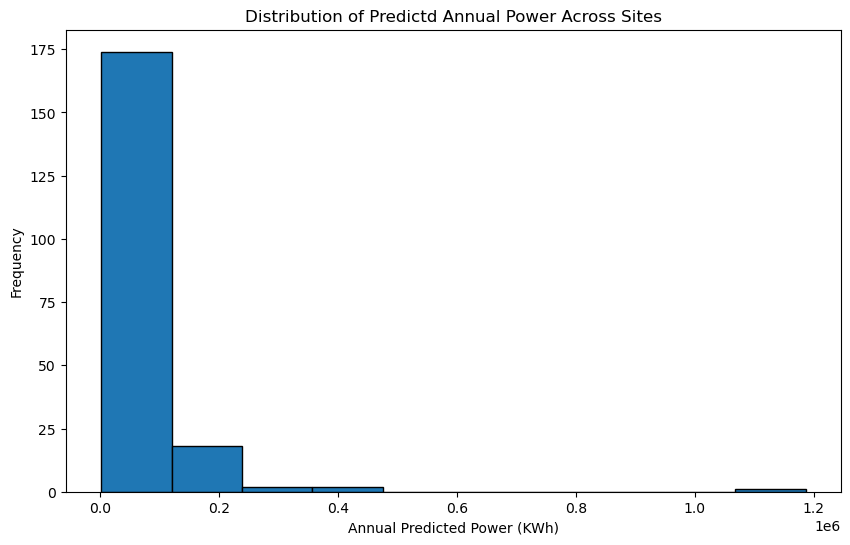

In [99]:
plt.figure(figsize=(10, 6))
plt.hist(df['Predicted Mean Annual Power (kWH/year)'], bins=10, edgecolor='black')
plt.xlabel('Annual Predicted Power (KWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Predictd Annual Power Across Sites')
plt.show()

One thing that is worth adding for context is the CO2 saved by these arrays. The EPA gives the amount of CO2 per kWh of natural gas generated power as 
0.000699 tons per kWh
https://www.epa.gov/energy/greenhouse-gases-equivalencies-calculator-calculations-and-references

In [100]:
CO2_gen_kwh = 0.000699

# Create a new column for annual CO2 generation savings
df["Annual CO2 Generation savings (ton)"] = df['Predicted Mean Annual Power (kWH/year)'] * CO2_gen_kwh

Next, we want to estimate the number of houses that each array can power. It's not a very valuable potential location if it can't power more than a couple houses. We will use the average household consumption numbers given in the 2020 report by the US Energy Information Administration.

https://www.eia.gov/consumption/residential/data/2020/c&e/pdf/ce2.1.pdf

In [101]:
# Define the average household consumption
# This value is pulled from US Energy Information Administration 2022 Report
avg_house_consump = 10566  # in kWh per year

# Calculate the number of houses powered
df['Houses Powered'] = round(df['Predicted Mean Annual Power (kWH/year)'] / avg_house_consump, 2)
df_quality_sites = df[df['Houses Powered'] >= 1]

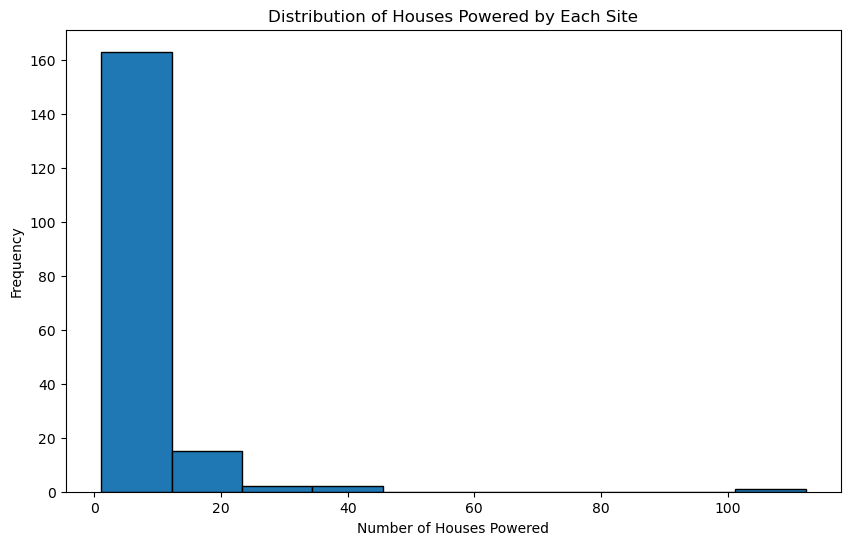

In [102]:
# Plot a histogram of the number of houses powered by each site
plt.figure(figsize=(10, 6))
plt.hist(df_quality_sites['Houses Powered'], bins=10, edgecolor='black')
plt.xlabel('Number of Houses Powered')
plt.ylabel('Frequency')
plt.title('Distribution of Houses Powered by Each Site')
plt.show()

In [103]:
# Load the Excel file with the specified worksheet
df_top_locs = pd.read_excel("top_locs_municipal_utilities_AddressMatched.xlsx", sheet_name="Updated Addresses")

# Create a dictionary mapping NGUID to place_name from the Excel file
nguid_to_place_name = df_top_locs.set_index('NGUID')['place_name'].to_dict()

# Add a new column to df_quality_sites based on the NGUID mapping, defaulting to "Manual Review" if NGUID is not found
df_quality_sites['Matched Place Name'] = df_quality_sites['NGUID'].map(nguid_to_place_name).fillna('Manual Review')

/tmp/ipykernel_23/2347027183.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quality_sites['Matched Place Name'] = df_quality_sites['NGUID'].map(nguid_to_place_name).fillna('Manual Review')


In [104]:
df_quality_sites.head()

,NGUID,State,LATITUDE,LONGITUDE,ORIG_ADDR,GEOCITY,GEOZIP,GEOSTATE,GEOBG20,GEOCOUNTY,...,potential_sun_quant,place_name,place_type,google_full_adrs,10k_ave_DACS,Nominal Power (W),Predicted Mean Annual Power (kWH/year),Annual CO2 Generation savings (ton),Houses Powered,Matched Place Name
0,URN:EMERGENCY:UID:GIS:SSAP:14108:GREENE.IN.US,IN,39.042062,-87.172579,618 W GLENBURN RD,LINTON,47441,IN,180559551001,GREENE,...,1277.818182,Glenburn Home,"['point_of_interest', 'health', 'establishment']","205 Soo Line Railroad, Linton, IN 47441, USA",17.149521,1157700.0,1.186664e+06,829.477821,112.31,"Franklin Glenburn Home, Inc"
1,URN:EMERGENCY:UID:GIS:SSAP:2585:DUBOIS.IN.US,IN,38.279798,-86.960411,903 SOUTH MAIN STREET,HUNTINGBURG,47542,IN,180379538004,DUBOIS,...,1364.909091,Central Christian Church,"['church', 'place_of_worship', 'point_of_inter...","903 S Main St, Huntingburg, IN 47542, USA",15.827830,373200.0,4.083487e+05,285.435710,38.65,Manual Review
2,URN:EMERGENCY:UID:GIS:SSAP:533:DUBOIS.IN.US,IN,38.308784,-86.959757,110 EAST VETERANS PARKWAY,HUNTINGBURG,47542,IN,180379538002,DUBOIS,...,1312.727273,Huntingburg,"['locality', 'political']","110 East 14th Street, Huntingburg, IN 47542, USA",15.827830,368400.0,3.891376e+05,272.007162,36.83,Manual Review
3,URN:EMERGENCY:UID:GIS:SSAP:1622:DUBOIS.IN.US,IN,38.295484,-86.948337,317 ST MARYS DRIVE WEST,HUNTINGBURG,47542,IN,180379538004,DUBOIS,...,1325.636364,Guadalupe Center,"['church', 'place_of_worship', 'point_of_inter...","313 N Washington St, Huntingburg, IN 47542, USA",15.827830,288300.0,3.065415e+05,214.272528,29.01,Manual Review
4,URN:EMERGENCY:UID:GIS:SSAP:2945:DAVIESS.IN.US,IN,38.660749,-87.172657,405 NE 3RD ST,WASHINGTON,47501,IN,180279548001,DAVIESS,...,1311.727273,Our Lady of Hope,"['church', 'place_of_worship', 'point_of_inter...","405 NE 3rd St, Washington, IN 47501, USA",18.704380,288000.0,3.032692e+05,211.985196,28.70,Our Lady of Hope


In [106]:
# Define the list of fields to include in the CSV
fields_to_export = [
    'NGUID', 'State', 'LATITUDE', 'LONGITUDE', 'ORIG_ADDR', 'GEOCITY', 'GEOZIP', 'GEOSTATE', 'GEOCOUNTY',
    'DACSTS', 'CT_DAC_score', '50k_ave_DACS', 'utility_name', 'utilitytype', 'coal_community', 'FFE_threshold',
    'imageryDate.year', 'imageryDate.month', 'imageryDate.day', 'solarPotential.maxArrayPanelsCount',
    'whole_sun_quant', 'place_name', 'google_full_adrs', 'Nominal Power (W)',
    'Predicted Mean Annual Power (kWH/year)', 'Houses Powered', 'Annual CO2 Generation savings (ton)', 'Matched Place Name'
]

# Filter the DataFrame to only include the specified fields
df_export = df_quality_sites[fields_to_export]

# Export the DataFrame to a CSV file
df_export.to_csv('quality_sites_export_v2.csv', index=False)

print("CSV export complete.")

CSV export complete.
